In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score, recall_score, log_loss, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import AdaBoostClassifier

In [2]:
df = pd.read_csv("Training_set_values.csv")
df1 = pd.read_csv("Training_set_labels.csv")

In [3]:
df1['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [4]:
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [5]:
result = pd.merge(df1, df, how='inner', on='id')

In [6]:
result[['permit']]

,permit
0,False
1,True
2,True
3,True
4,True
...,...
59395,True
59396,True
59397,False
59398,True


In [7]:
result['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [8]:
result['status'] = result.status_group.map({"non functional":0, "functional needs repair":1, "functional":2})

In [9]:
result

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,2
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,0
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2
59396,27263,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,2
59397,37057,functional,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,2
59398,31282,functional,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,2


In [10]:
result['region_code'].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [11]:
result['district_code'].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [12]:
from sklearn.preprocessing import OneHotEncoder
def onehotencoder(column_name, df):
    column_name_ohe = df[[column_name]]
    ohe = OneHotEncoder(categories = 'auto', sparse = False)
    ohe.fit(column_name_ohe)
    column_transformed = ohe.transform(column_name_ohe)
    column_encoded_ohe = pd.DataFrame(column_transformed, columns = ohe.get_feature_names([column_name]), index = df.id)
    return column_encoded_ohe

In [13]:
onehotencoder('water_quality', result)

,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown
id,,,,,,,,
69572,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8776,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34310,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
67743,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19728,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
60739,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27263,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
37057,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
result['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [15]:
water_well_df =  result[["id", 
                         "amount_tsh", 
                         "construction_year", 
                         "payment", 
                         "quality_group", 
                         "source", 
                         "waterpoint_type", 
                         "permit", 
                         "quantity", 
                         "status",
                         "region",
                         "basin"]]
                         
                        

In [16]:
water_well_df = water_well_df.set_index('id')

In [17]:
water_well_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         59400 non-null  float64
 1   construction_year  59400 non-null  int64  
 2   payment            59400 non-null  object 
 3   quality_group      59400 non-null  object 
 4   source             59400 non-null  object 
 5   waterpoint_type    59400 non-null  object 
 6   permit             56344 non-null  object 
 7   quantity           59400 non-null  object 
 8   status             59400 non-null  int64  
 9   region             59400 non-null  object 
 10  basin              59400 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 5.4+ MB


In [18]:
water_well_df.isna().sum()

amount_tsh              0
construction_year       0
payment                 0
quality_group           0
source                  0
waterpoint_type         0
permit               3056
quantity                0
status                  0
region                  0
basin                   0
dtype: int64

In [19]:
water_well_df = water_well_df.dropna()

In [20]:
water_well_df.isna().sum()

amount_tsh           0
construction_year    0
payment              0
quality_group        0
source               0
waterpoint_type      0
permit               0
quantity             0
status               0
region               0
basin                0
dtype: int64

In [21]:
water_well_df

,amount_tsh,construction_year,payment,quality_group,source,waterpoint_type,permit,quantity,status,region,basin
id,,,,,,,,,,,
69572,6000.0,1999,pay annually,good,spring,communal standpipe,False,enough,2,Iringa,Lake Nyasa
8776,0.0,2010,never pay,good,rainwater harvesting,communal standpipe,True,insufficient,2,Mara,Lake Victoria
34310,25.0,2009,pay per bucket,good,dam,communal standpipe multiple,True,enough,2,Manyara,Pangani
67743,0.0,1986,never pay,good,machine dbh,communal standpipe multiple,True,dry,0,Mtwara,Ruvuma / Southern Coast
19728,0.0,0,never pay,good,rainwater harvesting,communal standpipe,True,seasonal,2,Kagera,Lake Victoria
...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,1999,pay per bucket,good,spring,communal standpipe,True,enough,2,Kilimanjaro,Pangani
27263,4700.0,1996,pay annually,good,river,communal standpipe,True,enough,2,Iringa,Rufiji
37057,0.0,0,pay monthly,fluoride,machine dbh,hand pump,False,enough,2,Mbeya,Rufiji


In [22]:
X = water_well_df.drop('status', axis=1)
y = water_well_df["status"]

In [23]:
X_obj_ohe = X.select_dtypes('object')

ohe = OneHotEncoder(sparse=False)

dums = ohe.fit_transform(X_obj_ohe)
dums_df = pd.DataFrame(dums, columns=ohe.get_feature_names(), index=X.index)

In [24]:
dums_df

,x0_never pay,x0_other,x0_pay annually,x0_pay monthly,x0_pay per bucket,x0_pay when scheme fails,x0_unknown,x1_colored,x1_fluoride,x1_good,...,x6_Tanga,x7_Internal,x7_Lake Nyasa,x7_Lake Rukwa,x7_Lake Tanganyika,x7_Lake Victoria,x7_Pangani,x7_Rufiji,x7_Ruvuma / Southern Coast,x7_Wami / Ruvu
id,,,,,,,,,,,,,,,,,,,,,
69572,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8776,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34310,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
67743,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19728,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
27263,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
37057,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
X_int_std = X.select_dtypes('int64', 'float64')

ss = StandardScaler()

ss.fit(X_int_std)
nums_df = pd.DataFrame(ss.transform(X_int_std), index=X.index)

In [26]:
X_clean = pd.concat([nums_df, dums_df], axis=1)

In [27]:
X_clean

,0,x0_never pay,x0_other,x0_pay annually,x0_pay monthly,x0_pay per bucket,x0_pay when scheme fails,x0_unknown,x1_colored,x1_fluoride,...,x6_Tanga,x7_Internal,x7_Lake Nyasa,x7_Lake Rukwa,x7_Lake Tanganyika,x7_Lake Victoria,x7_Pangani,x7_Rufiji,x7_Ruvuma / Southern Coast,x7_Wami / Ruvu
id,,,,,,,,,,,,,,,,,,,,,
69572,0.731967,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8776,0.743534,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34310,0.742483,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
67743,0.718296,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19728,-1.370190,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,0.731967,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
27263,0.728812,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
37057,-1.370190,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
y.value_counts()

2    30586
0    21741
1     4017
Name: status, dtype: int64

In [29]:
log_model = LogisticRegression(multi_class = "multinomial", solver='lbfgs')
log_model.fit(X_clean, y)

/Users/jeonwookkang/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [30]:
y_pred = log_model.predict(X_clean)

accuracy_score(y, y_pred)

0.7210528184012495

In [31]:
log_model = LogisticRegression(multi_class = "multinomial", solver='lbfgs')
log_model.fit(X_clean, y)

y_pred = log_model.predict(X_clean)

accuracy_score(y, y_pred)

/Users/jeonwookkang/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7210528184012495

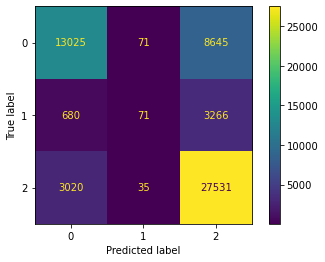

In [32]:
plot_confusion_matrix(log_model, X_clean, y)

In [33]:
df[['district_code', 'region','lga']]

,district_code,region,lga
0,5,Iringa,Ludewa
1,2,Mara,Serengeti
2,4,Manyara,Simanjiro
3,63,Mtwara,Nanyumbu
4,1,Kagera,Karagwe
...,...,...,...
59395,5,Kilimanjaro,Hai
59396,4,Iringa,Njombe
59397,7,Mbeya,Mbarali
59398,4,Dodoma,Chamwino


In [34]:
df.district_code.value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [35]:
df.region.value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [36]:
knn_model = KNeighborsClassifier()

knn_model.fit(X_clean, y)

KNeighborsClassifier()

In [37]:
score = cross_val_score(estimator=knn_model, X=X_clean, y=y, cv=10)
score

array([0.75403727, 0.75119787, 0.75048802, 0.74037267, 0.75772098,
       0.74671636, 0.75115371, 0.74529641, 0.75470359, 0.75168619])

In [38]:
knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_clean, y)

KNeighborsClassifier(n_neighbors=3)

In [39]:
score = cross_val_score(estimator=knn_model, X=X_clean, y=y, cv=10)
score.mean()

0.7437350362657449

In [40]:
knn_model = KNeighborsClassifier(n_neighbors=13)

knn_model.fit(X_clean, y)

KNeighborsClassifier(n_neighbors=13)

In [41]:
score = cross_val_score(estimator=knn_model, X=X_clean, y=y, cv=10)
score.mean()

0.759939167035986

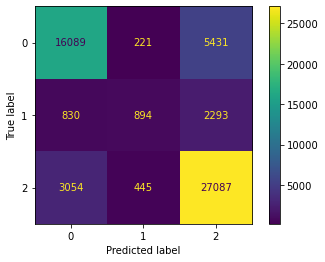

In [42]:
plot_confusion_matrix(knn_model, X_clean, y)

In [43]:
ct = DecisionTreeClassifier(max_depth=None)

ct.fit(X_clean, y)

score = cross_val_score(estimator=ct, X=X_clean, y=y, cv=10)
score.mean()

0.7606665387829439

In [44]:
ct = DecisionTreeClassifier(max_depth=None)

ct.fit(X_clean, y)
ct.score(X_clean, y)

0.8445264801930995

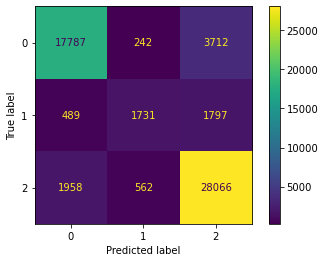

In [45]:
plot_confusion_matrix(ct, X_clean, y)

In [46]:
ada = AdaBoostClassifier(n_estimators=1000)
ada.fit(X_clean, y)
ada.score(X_clean, y)

0.7252591225330115

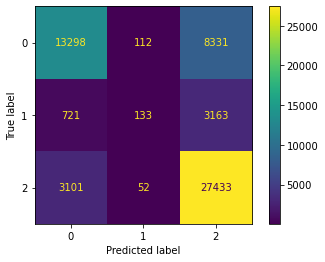

In [47]:
plot_confusion_matrix(ada, X_clean, y)

In [48]:
water_well_df =  result[["id", 
                         "amount_tsh", 
                         "construction_year", 
                         "payment", 
                         "quality_group", 
                         "source", 
                         "waterpoint_type", 
                         "permit", 
                         "quantity", 
                         "region",
                         "basin",
                        "region_code",
                        "district_code",
                        "longitude",
                        "latitude"]]
                         

In [49]:
water_well_df = water_well_df.set_index('id')

In [50]:
water_well_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         59400 non-null  float64
 1   construction_year  59400 non-null  int64  
 2   payment            59400 non-null  object 
 3   quality_group      59400 non-null  object 
 4   source             59400 non-null  object 
 5   waterpoint_type    59400 non-null  object 
 6   permit             56344 non-null  object 
 7   quantity           59400 non-null  object 
 8   region             59400 non-null  object 
 9   basin              59400 non-null  object 
 10  region_code        59400 non-null  int64  
 11  district_code      59400 non-null  int64  
 12  longitude          59400 non-null  float64
 13  latitude           59400 non-null  float64
dtypes: float64(3), int64(3), object(8)
memory usage: 6.8+ MB


In [51]:
water_well_df = water_well_df.dropna()

In [52]:
water_well_df['permit'] = water_well_df['permit'].astype(int)

In [53]:
water_well_df['permit'].value_counts()

1    38852
0    17492
Name: permit, dtype: int64

In [54]:
X_obj = water_well_df.select_dtypes('object')

In [55]:
X_obj.columns

Index(['payment', 'quality_group', 'source', 'waterpoint_type', 'quantity',
       'region', 'basin'],
      dtype='object')

In [56]:
lengthout = []
for x in X_obj.columns:
    lengthout.append(len(X_obj[x].value_counts()))
sum(lengthout)
    
    

65

In [57]:
ohe = OneHotEncoder(categories='auto', sparse=False, drop='first')

ww = ohe.fit_transform(X_obj)
wwdf = pd.DataFrame(ww, columns=ohe.get_feature_names(), index=water_well_df.index)


In [58]:
wwdf

,x0_other,x0_pay annually,x0_pay monthly,x0_pay per bucket,x0_pay when scheme fails,x0_unknown,x1_fluoride,x1_good,x1_milky,x1_salty,...,x5_Tabora,x5_Tanga,x6_Lake Nyasa,x6_Lake Rukwa,x6_Lake Tanganyika,x6_Lake Victoria,x6_Pangani,x6_Rufiji,x6_Ruvuma / Southern Coast,x6_Wami / Ruvu
id,,,,,,,,,,,,,,,,,,,,,
69572,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34310,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
67743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
27263,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
37057,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [59]:
X_int = water_well_df.select_dtypes(exclude='object')

In [60]:
X_int.head()

,amount_tsh,construction_year,permit,region_code,district_code,longitude,latitude
id,,,,,,,
69572,6000.0,1999,0,11,5,34.938093,-9.856322
8776,0.0,2010,1,20,2,34.698766,-2.147466
34310,25.0,2009,1,21,4,37.460664,-3.821329
67743,0.0,1986,1,90,63,38.486161,-11.155298
19728,0.0,0,1,18,1,31.130847,-1.825359


In [61]:
X_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56344 entries, 69572 to 26348
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         56344 non-null  float64
 1   construction_year  56344 non-null  int64  
 2   permit             56344 non-null  int64  
 3   region_code        56344 non-null  int64  
 4   district_code      56344 non-null  int64  
 5   longitude          56344 non-null  float64
 6   latitude           56344 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 3.4 MB


In [62]:
ss = StandardScaler()
wws = ss.fit_transform(X_int)

wwsdf = pd.DataFrame(wws, index=water_well_df.index)

In [63]:
wwsdf

,0,1,2,3,4,5,6
id,,,,,,,
69572,2.142864,0.731967,-1.490345,-0.250602,-0.078606,0.133561,-1.406913
8776,-0.121572,0.743534,0.670985,0.249556,-0.382706,0.098028,1.202020
34310,-0.112137,0.742483,0.670985,0.305129,-0.179973,0.508098,0.635529
67743,-0.121572,0.718296,0.670985,4.139672,5.800646,0.660357,-1.846529
19728,-0.121572,-1.370190,0.670985,0.138410,-0.484072,-0.431716,1.311031
...,...,...,...,...,...,...,...
60739,-0.117798,0.731967,0.670985,-0.695186,-0.078606,0.464913,0.827583
27263,1.652236,0.728812,0.670985,-0.250602,-0.179973,0.179870,-1.141008
37057,-0.121572,-1.370190,-1.490345,-0.195029,0.124126,-0.003184,-1.032644


In [64]:
X_train = pd.concat([wwsdf, wwdf], axis=1)

In [65]:
X_train

,0,1,2,3,4,5,6,x0_other,x0_pay annually,x0_pay monthly,...,x5_Tabora,x5_Tanga,x6_Lake Nyasa,x6_Lake Rukwa,x6_Lake Tanganyika,x6_Lake Victoria,x6_Pangani,x6_Rufiji,x6_Ruvuma / Southern Coast,x6_Wami / Ruvu
id,,,,,,,,,,,,,,,,,,,,,
69572,2.142864,0.731967,-1.490345,-0.250602,-0.078606,0.133561,-1.406913,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8776,-0.121572,0.743534,0.670985,0.249556,-0.382706,0.098028,1.202020,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34310,-0.112137,0.742483,0.670985,0.305129,-0.179973,0.508098,0.635529,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
67743,-0.121572,0.718296,0.670985,4.139672,5.800646,0.660357,-1.846529,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19728,-0.121572,-1.370190,0.670985,0.138410,-0.484072,-0.431716,1.311031,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,-0.117798,0.731967,0.670985,-0.695186,-0.078606,0.464913,0.827583,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
27263,1.652236,0.728812,0.670985,-0.250602,-0.179973,0.179870,-1.141008,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
37057,-0.121572,-1.370190,-1.490345,-0.195029,0.124126,-0.003184,-1.032644,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [66]:
knn_model1 = KNeighborsClassifier(n_neighbors=10)

knn_model1.fit(X_train, y)
score = cross_val_score(estimator=knn_model1, X=X_train, y=y, cv=10)
print(score.mean())

0.7663637145370721


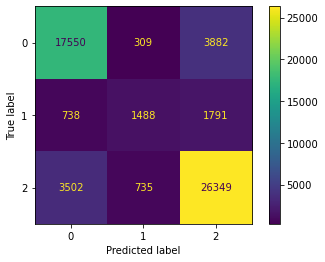

In [67]:
plot_confusion_matrix(knn_model1, X_train, y)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.2)

In [69]:
knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [70]:
knn_model.score(X_test, y_test)

0.7672375543526488

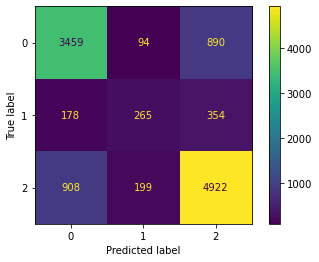

In [71]:
plot_confusion_matrix(knn_model, X_test, y_test)

In [72]:
test_df = pd.read_csv('Test_set_values.csv')

In [73]:
test_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [76]:
test_df.set_index('id')

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe


In [1]:
import folium

In [2]:
m = folium.Map(location=[-6.5, 36], zoom_start=6.4)

In [3]:
m

In [ ]:
location = result[['longitude', 'latitude', 'status']]

In [ ]:
location.head()

In [ ]:
type(location.longitude)

In [ ]:
mapit = folium.Map(location=[-6.5, 36], zoom_start=6.4)
location = location[['latitude', 'longitude']]
locationlist = location.values.tolist()

In [ ]:
len(locationlist)